In [1]:
"""
Created on Wed Apr 20 14:39:43 2022

Example of Digit Recogniser.
Dataset: MNIST
Classifier: Support vector machine.

@author: Shu-wei Huang
"""

# Standard scientific Python imports
import matplotlib.pyplot as plt
import pandas as pd

# Import datasets, classifiers and performance metrics
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


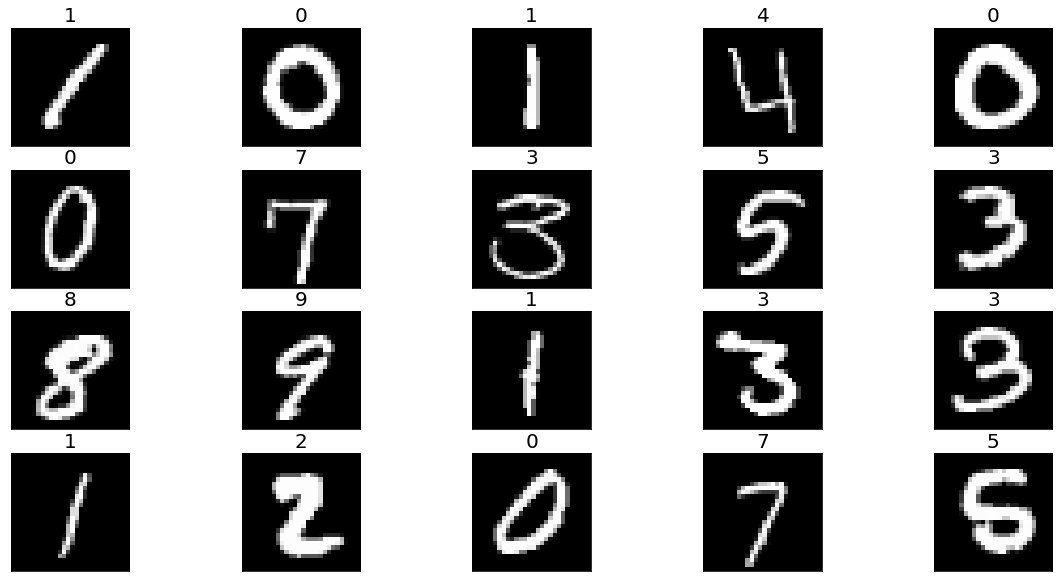

In [2]:
'''
Read data.
MNIST dataset.
'''
train = pd.read_csv('C:/Users/User/Desktop/Programming/Python/Data/digit-recognizer/train.csv')
Test = pd.read_csv('C:/Users/User/Desktop/Programming/Python/Data/digit-recognizer/test.csv')

train_y=train['label']
train_x=train.drop(labels = ["label"],axis = 1)

'''
Show a part of data.
'''
plt.figure(figsize=(20, 10))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    xx = train_x.iloc[i].to_numpy()
    plt.imshow(xx.reshape((28,28)), cmap='gray')
    plt.title(train_y[i],size = 20)

plt.show()

In [3]:

'''
Transform data variances to arrays.
'''
from keras.utils import np_utils

train_y = train_y.to_numpy()
train_x = train_x.to_numpy()/255
test = Test.to_numpy()/255

train_x, test_x, train_y, test_y = train_test_split(train_x, 
                                                    train_y, 
                                                    test_size = 0.5,
                                                    shuffle=True)

train_y_true = train_y
test_y_true = test_y


Using TensorFlow backend.
D:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529

# Linear SVM

In [4]:
'''
Built and train Linear SVM.
'''
clf = svm.LinearSVC()

# Learn the digits on the train subset
clf.fit(train_x, train_y_true)

# Predict the value of the digit on the test subset
predicted = clf.predict(test_x)

D:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Predictions


D:\Users\User\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


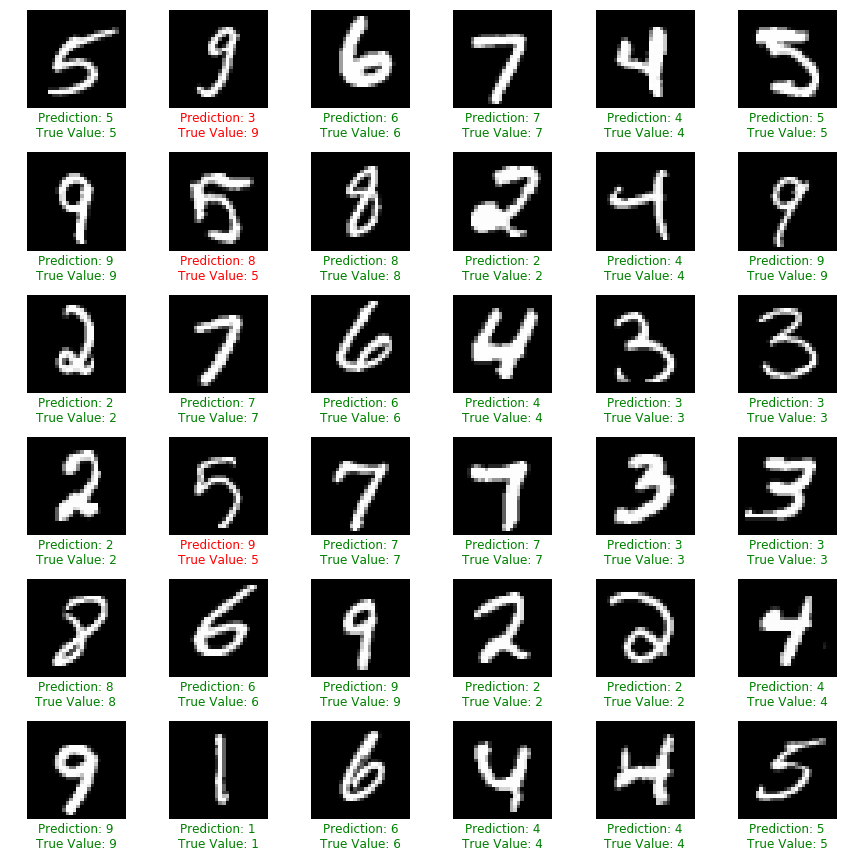

In [5]:
rows = 6
cols = 6

shift = 550
f = plt.figure(figsize=(2*cols,2*rows))
print("Predictions")

for i in range(rows*cols): 
    f.add_subplot(rows,cols,i+1)
    img = test_x[i+shift]
    img = img.reshape((28,28))
    plt.imshow(img,
               cmap='gray')
    plt.axis("off")
    if predicted[i+shift] != test_y_true[i+shift]:
        plt.title("Prediction: {}\nTrue Value: {}".format(predicted[i+shift], test_y_true[i+shift]),
                  y=-0.35,color="red")
    else:
        plt.title("Prediction: {}\nTrue Value: {}".format(predicted[i+shift], test_y_true[i+shift]),
                  y=-0.35,color="green")
    
f.tight_layout()
f.show()



In [6]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(test_y_true, predicted)}\n"
)

Classification report for classifier LinearSVC():
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2115
           1       0.94      0.97      0.95      2294
           2       0.89      0.87      0.88      2071
           3       0.87      0.88      0.88      2195
           4       0.91      0.91      0.91      2051
           5       0.86      0.86      0.86      1889
           6       0.93      0.94      0.94      2115
           7       0.91      0.92      0.92      2140
           8       0.87      0.84      0.85      2018
           9       0.88      0.86      0.87      2112

    accuracy                           0.90     21000
   macro avg       0.90      0.90      0.90     21000
weighted avg       0.90      0.90      0.90     21000




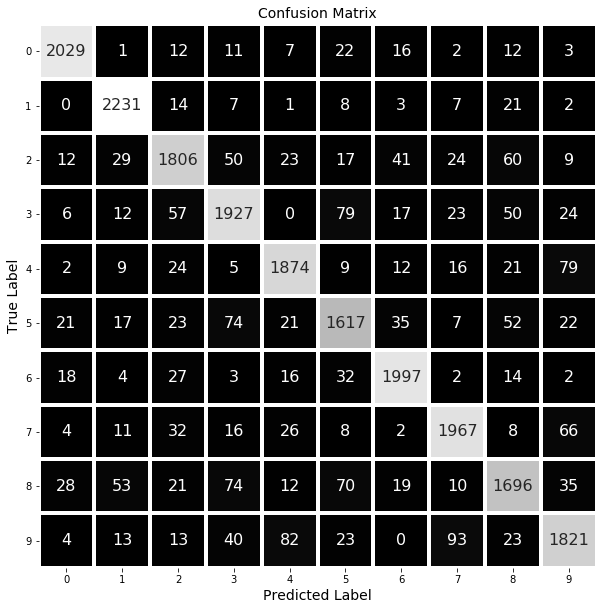

In [7]:
import seaborn as sns

cm = confusion_matrix(test_y_true, predicted, labels=clf.classes_)

f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True,
            linewidths=3,cmap="gray",
            fmt= '.0f',ax=ax,
            cbar = False,
           annot_kws={"size": 16})
plt.yticks(rotation = 0)
plt.xlabel("Predicted Label", size = 14)
plt.ylabel("True Label", size = 14)
plt.title("Confusion Matrix", size = 14)
plt.show()

In [8]:
score = clf.score(test_x, test_y_true)

print('Accuracy: ', score)

Accuracy:  0.9030952380952381


#  non-Linear SVM with rbf kernal

In [9]:
'''
Built and train non-Linear SVM.
'''
clf_rbf = svm.SVC(kernel='rbf', gamma=0.01, C=0.1)

# Learn the digits on the train subset
clf_rbf.fit(train_x, train_y_true)

# Predict the value of the digit on the test subset
predicted = clf_rbf.predict(test_x)

Predictions


D:\Users\User\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


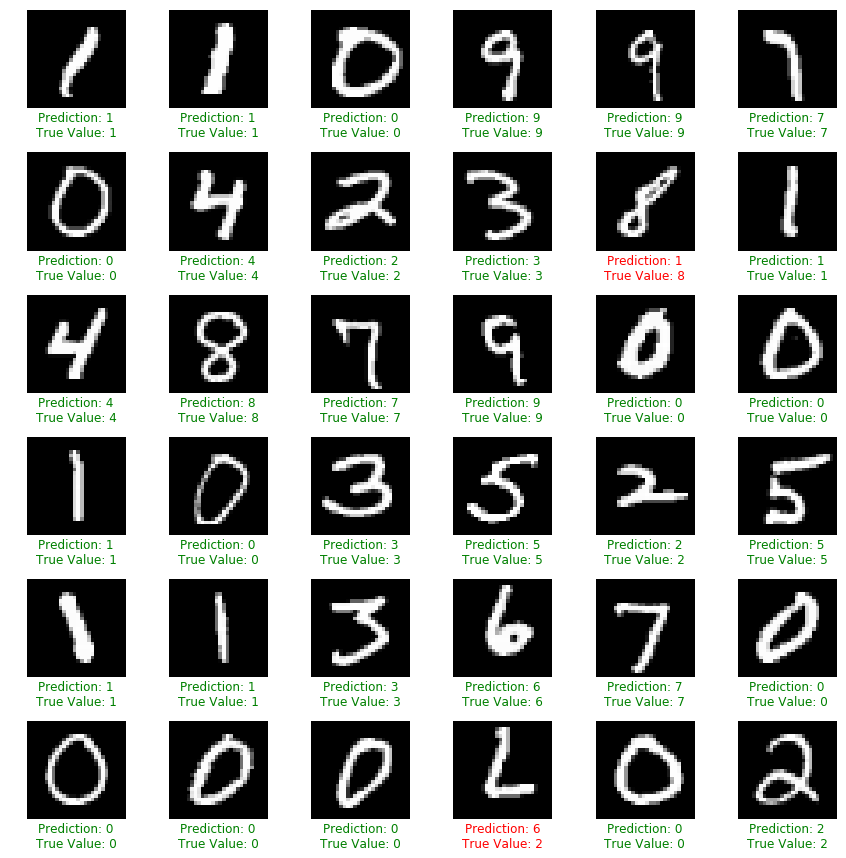

In [10]:
rows = 6
cols = 6

shift = 250
f = plt.figure(figsize=(2*cols,2*rows))
print("Predictions")

for i in range(rows*cols): 
    f.add_subplot(rows,cols,i+1)
    img = test_x[i+shift]
    img = img.reshape((28,28))
    plt.imshow(img,
               cmap='gray')
    plt.axis("off")
    if predicted[i+shift] != test_y_true[i+shift]:
        plt.title("Prediction: {}\nTrue Value: {}".format(predicted[i+shift], test_y_true[i+shift]),
                  y=-0.35,color="red")
    else:
        plt.title("Prediction: {}\nTrue Value: {}".format(predicted[i+shift], test_y_true[i+shift]),
                  y=-0.35,color="green")
    
f.tight_layout()
f.show()



In [11]:
print(
    f"Classification report for classifier {clf_rbf}:\n"
    f"{metrics.classification_report(test_y_true, predicted)}\n"
)

Classification report for classifier SVC(C=0.1, gamma=0.01):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2115
           1       0.95      0.98      0.97      2294
           2       0.94      0.92      0.93      2071
           3       0.93      0.91      0.92      2195
           4       0.92      0.95      0.93      2051
           5       0.91      0.93      0.92      1889
           6       0.95      0.97      0.96      2115
           7       0.95      0.93      0.94      2140
           8       0.93      0.90      0.92      2018
           9       0.93      0.90      0.91      2112

    accuracy                           0.94     21000
   macro avg       0.94      0.94      0.94     21000
weighted avg       0.94      0.94      0.94     21000




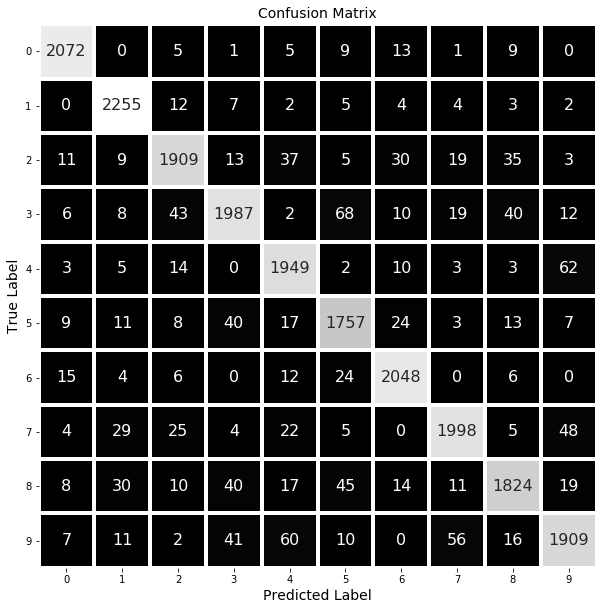

In [12]:
import seaborn as sns

cm = confusion_matrix(test_y_true, predicted, labels=clf_rbf.classes_)

f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True,
            linewidths=3,cmap="gray",
            fmt= '.0f',ax=ax,
            cbar = False,
           annot_kws={"size": 16})
plt.yticks(rotation = 0)
plt.xlabel("Predicted Label", size = 14)
plt.ylabel("True Label", size = 14)
plt.title("Confusion Matrix", size = 14)
plt.show()

In [13]:
score = clf_rbf.score(test_x, test_y_true)

print('Accuracy: ', score)

Accuracy:  0.9384761904761905


# non-Linear SVM with linear kernal

In [14]:
'''
Built and train non-Linear SVM.
'''
clf_L = svm.SVC(kernel='linear')

# Learn the digits on the train subset
clf_L.fit(train_x, train_y_true)

# Predict the value of the digit on the test subset
predicted = clf_L.predict(test_x)

Predictions


D:\Users\User\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


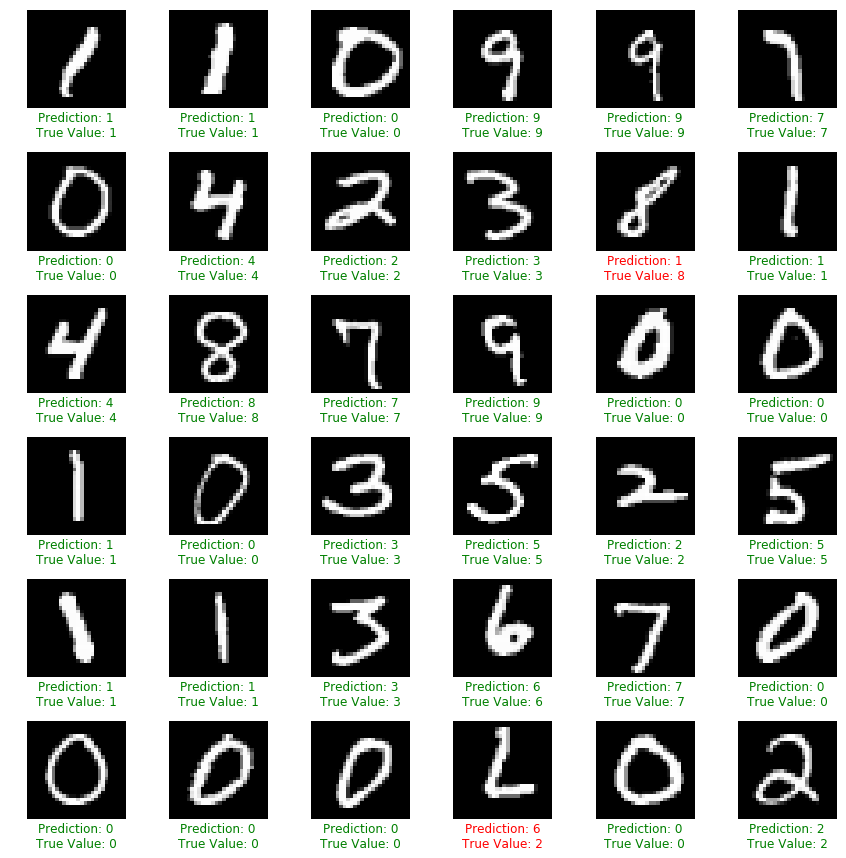

In [15]:
rows = 6
cols = 6

shift = 250
f = plt.figure(figsize=(2*cols,2*rows))
print("Predictions")

for i in range(rows*cols): 
    f.add_subplot(rows,cols,i+1)
    img = test_x[i+shift]
    img = img.reshape((28,28))
    plt.imshow(img,
               cmap='gray')
    plt.axis("off")
    if predicted[i+shift] != test_y_true[i+shift]:
        plt.title("Prediction: {}\nTrue Value: {}".format(predicted[i+shift], test_y_true[i+shift]),
                  y=-0.35,color="red")
    else:
        plt.title("Prediction: {}\nTrue Value: {}".format(predicted[i+shift], test_y_true[i+shift]),
                  y=-0.35,color="green")
    
f.tight_layout()
f.show()



In [16]:
print(
    f"Classification report for classifier {clf_L}:\n"
    f"{metrics.classification_report(test_y_true, predicted)}\n"
)

Classification report for classifier SVC(kernel='linear'):
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2115
           1       0.94      0.99      0.96      2294
           2       0.89      0.91      0.90      2071
           3       0.89      0.90      0.90      2195
           4       0.91      0.93      0.92      2051
           5       0.91      0.88      0.89      1889
           6       0.95      0.95      0.95      2115
           7       0.93      0.93      0.93      2140
           8       0.92      0.87      0.89      2018
           9       0.92      0.88      0.90      2112

    accuracy                           0.92     21000
   macro avg       0.92      0.92      0.92     21000
weighted avg       0.92      0.92      0.92     21000




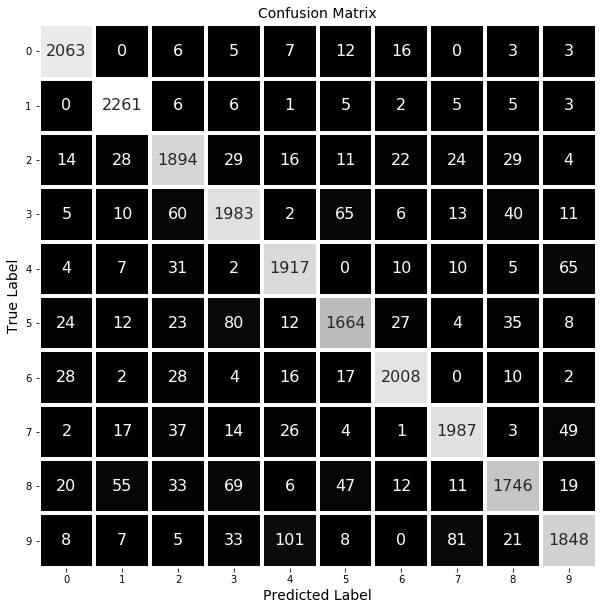

In [17]:
import seaborn as sns

cm = confusion_matrix(test_y_true, predicted, labels=clf_L.classes_)

f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True,
            linewidths=3,cmap="gray",
            fmt= '.0f',ax=ax,
            cbar = False,
           annot_kws={"size": 16})
plt.yticks(rotation = 0)
plt.xlabel("Predicted Label", size = 14)
plt.ylabel("True Label", size = 14)
plt.title("Confusion Matrix", size = 14)
plt.show()

In [18]:
score = clf_L.score(test_x, test_y_true)

print('Accuracy: ', score)

Accuracy:  0.9224285714285714


# non-Linear SVM with polynomial kernal

In [19]:
'''
Built and train non-Linear SVM.
'''
clf = svm.SVC(kernel='poly',degree=2,coef0=1.0,C=100)

# Learn the digits on the train subset
clf.fit(train_x, train_y_true)

# Predict the value of the digit on the test subset
predicted = clf.predict(test_x)

Predictions


D:\Users\User\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


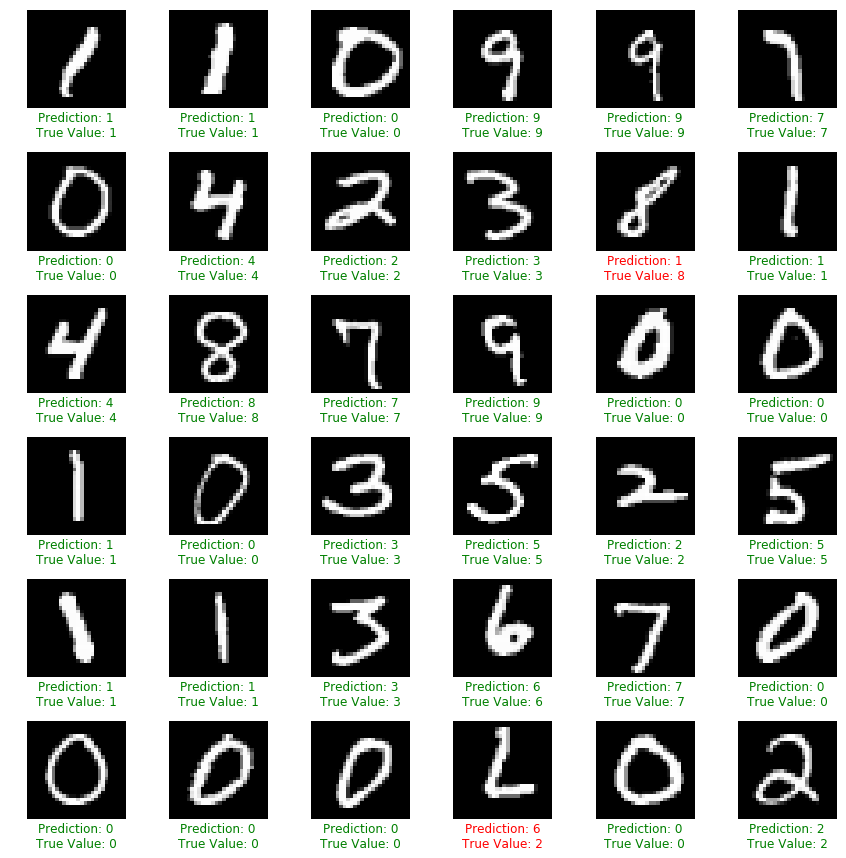

In [20]:
rows = 6
cols = 6

shift = 250
f = plt.figure(figsize=(2*cols,2*rows))
print("Predictions")

for i in range(rows*cols): 
    f.add_subplot(rows,cols,i+1)
    img = test_x[i+shift]
    img = img.reshape((28,28))
    plt.imshow(img,
               cmap='gray')
    plt.axis("off")
    if predicted[i+shift] != test_y_true[i+shift]:
        plt.title("Prediction: {}\nTrue Value: {}".format(predicted[i+shift], test_y_true[i+shift]),
                  y=-0.35,color="red")
    else:
        plt.title("Prediction: {}\nTrue Value: {}".format(predicted[i+shift], test_y_true[i+shift]),
                  y=-0.35,color="green")
    
f.tight_layout()
f.show()



In [21]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(test_y_true, predicted)}\n"
)

Classification report for classifier SVC(C=100, coef0=1.0, degree=2, kernel='poly'):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2115
           1       0.98      0.99      0.98      2294
           2       0.95      0.96      0.96      2071
           3       0.96      0.96      0.96      2195
           4       0.96      0.97      0.96      2051
           5       0.96      0.95      0.96      1889
           6       0.98      0.98      0.98      2115
           7       0.97      0.96      0.97      2140
           8       0.97      0.95      0.96      2018
           9       0.96      0.94      0.95      2112

    accuracy                           0.97     21000
   macro avg       0.97      0.97      0.97     21000
weighted avg       0.97      0.97      0.97     21000




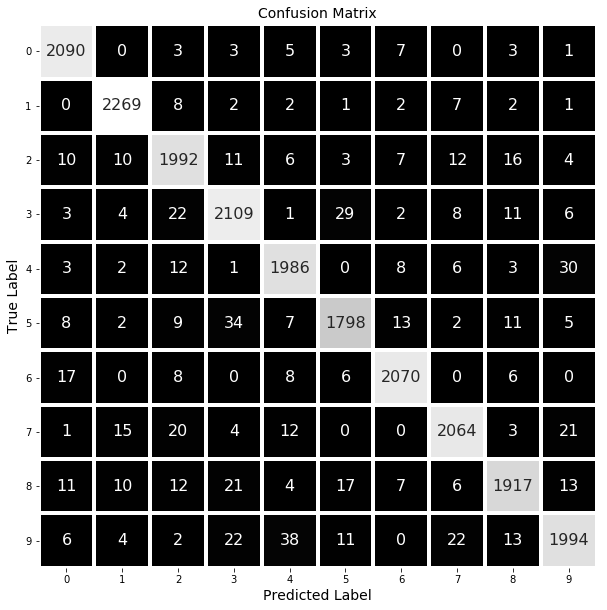

In [22]:
import seaborn as sns

cm = confusion_matrix(test_y_true, predicted, labels=clf.classes_)

f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True,
            linewidths=3,cmap="gray",
            fmt= '.0f',ax=ax,
            cbar = False,
           annot_kws={"size": 16})
plt.yticks(rotation = 0)
plt.xlabel("Predicted Label", size = 14)
plt.ylabel("True Label", size = 14)
plt.title("Confusion Matrix", size = 14)
plt.show()

In [23]:
score = clf.score(test_x, test_y_true)

print('Accuracy: ', score)

Accuracy:  0.9661428571428572
